# 흐름
* 데이터 셋이 df 하나로 주어지고 submission 이 따로 없어서
* 팀원만의 작은 대회 진행


* 피처엔지니어링
* 값이 모두 같은 컬럼 drop
* 왜도, 이상치 확인 => 유일값으로 인해서 drop 안 하기로 결정!
* 이상치 처리: 전부 1로 통일, MinMaxScale, 이상치 있는 컬럼 drop, 구간화 4가지 경우 해봤을 때 
* => 이상치 있는 컬럼 구간화하는 것이 제일 점수가 좋았음


* train_train / train_valid / test 나누기
* train_train 에만 오버샘플링하고
* model.fit(X_train_train, y_train_train)
* y_train_predict = model.predict(X_train_valid)
* y_train_valid 와 y_train_predict 로 점수 예측


* 여러가지 분류 모델로 돌려보고
* feature importance 로 다시 골라내고
* 하이퍼파라미터 튜닝 
* => 랜덤서치 사용시 cv 때문에 오버샘플링 안 한 데이터를 학습시키니
* => 성능이 매우 낮아짐!


* y_predict = model.predict(X_test)
* solution 과 y_predict 비교


* 지표는 f1, recall

# 데이터 불러오기

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터셋 불러오기
df = pd.read_csv('data/data.csv.zip')

df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
# 피처와 레이블 분리
label_name = 'Bankrupt?'
feature_name = df.drop(columns=label_name).columns

label_name, feature_name

('Bankrupt?',
 Index([' ROA(C) before interest and depreciation before interest',
        ' ROA(A) before interest and % after tax',
        ' ROA(B) before interest and depreciation after tax',
        ' Operating Gross Margin', ' Realized Sales Gross Margin',
        ' Operating Profit Rate', ' Pre-tax net Interest Rate',
        ' After-tax net Interest Rate',
        ' Non-industry income and expenditure/revenue',
        ' Continuous interest rate (after tax)', ' Operating Expense Rate',
        ' Research and development expense rate', ' Cash flow rate',
        ' Interest-bearing debt interest rate', ' Tax rate (A)',
        ' Net Value Per Share (B)', ' Net Value Per Share (A)',
        ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
        ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
        ' Operating Profit Per Share (Yuan ¥)',
        ' Per Share Net profit before tax (Yuan ¥)',
        ' Realized Sales Gross Profit Growth Rate',
        

In [4]:
# X, y
X = df[feature_name]
y = df[label_name]

X.shape, y.shape

((6819, 95), (6819,))

In [5]:
# # 띄어쓰기 채우기

# feature_rename = []
# for i in feature_name:
#     rename = i.replace(' ', '_')[1:]
#     feature_rename.append(rename)
    
# X.columns = feature_rename

# X.sample()

In [6]:
# 피처 익명화

feature_rename = []
for i in range(len(feature_name)):
    rename = f'x{i+1}'
    feature_rename.append(rename)
    
X.columns = feature_rename

X.sample()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95
4728,0.595915,0.65749,0.645645,0.623243,0.623243,0.999238,0.797723,0.809599,0.303544,0.781881,...,0.873396,0.000424,0.623968,0.62324,0.845258,0.277776,0.026797,0.565185,1,0.041513


# 전처리

In [7]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
# 결측치 확인
X.isnull().sum().sum()

0

In [9]:
# info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6819 non-null   float64
 1   x2      6819 non-null   float64
 2   x3      6819 non-null   float64
 3   x4      6819 non-null   float64
 4   x5      6819 non-null   float64
 5   x6      6819 non-null   float64
 6   x7      6819 non-null   float64
 7   x8      6819 non-null   float64
 8   x9      6819 non-null   float64
 9   x10     6819 non-null   float64
 10  x11     6819 non-null   float64
 11  x12     6819 non-null   float64
 12  x13     6819 non-null   float64
 13  x14     6819 non-null   float64
 14  x15     6819 non-null   float64
 15  x16     6819 non-null   float64
 16  x17     6819 non-null   float64
 17  x18     6819 non-null   float64
 18  x19     6819 non-null   float64
 19  x20     6819 non-null   float64
 20  x21     6819 non-null   float64
 21  x22     6819 non-null   float64
 22  

In [10]:
# x94 은 전부 1로 되어 있어서 drop 해도 되겠군
X.select_dtypes(include='int64').describe()

,x85,x94
count,6819.000000,6819.0
mean,0.001173,1.0
std,0.034234,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,0.000000,1.0
75%,0.000000,1.0
max,1.000000,1.0


In [11]:
X = X.drop(columns='x94').copy()
X.sample()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x85,x86,x87,x88,x89,x90,x91,x92,x93,x95
4732,0.527568,0.579045,0.578457,0.604585,0.604585,0.999054,0.79755,0.809467,0.303627,0.781737,...,0,0.82162,0.000757,0.621823,0.604587,0.842352,0.281041,0.026977,0.565913,0.025453


In [12]:
# int64 타입이 아닌데도 절반 이상이 0으로 되어있는 컬럼이 있는 듯?
X.select_dtypes(exclude='int64').describe().T.describe() 

# => 최소값이 0인 컬럼 수가 많다
# => histogram 그려볼 필요가 있다

,count,mean,std,min,25%,50%,75%,max
count,93.0,9.300000e+01,9.300000e+01,93.0,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01
mean,6819.0,2.008865e+08,2.966854e+08,0.0,5.225806e+07,8.590323e+07,3.119892e+08,2.248495e+09
std,0.0,7.535324e+08,8.313674e+08,0.0,5.039585e+08,6.732401e+08,1.235075e+09,4.040363e+09
min,6819.0,2.548946e-03,8.959384e-03,0.0,0.000000e+00,1.987816e-04,4.525945e-04,1.000000e+00
25%,6819.0,2.288129e-01,1.391028e-02,0.0,7.555047e-03,2.267395e-02,4.290323e-02,1.000000e+00
50%,6819.0,5.940063e-01,3.338977e-02,0.0,2.175795e-01,2.771777e-01,3.286235e-01,1.000000e+00
75%,6819.0,4.032850e+05,3.330216e+07,0.0,5.939344e-01,6.059975e-01,6.630619e-01,9.900000e+08
max,6819.0,5.508097e+09,3.374944e+09,0.0,4.860000e+09,6.400000e+09,7.390000e+09,1.000000e+10


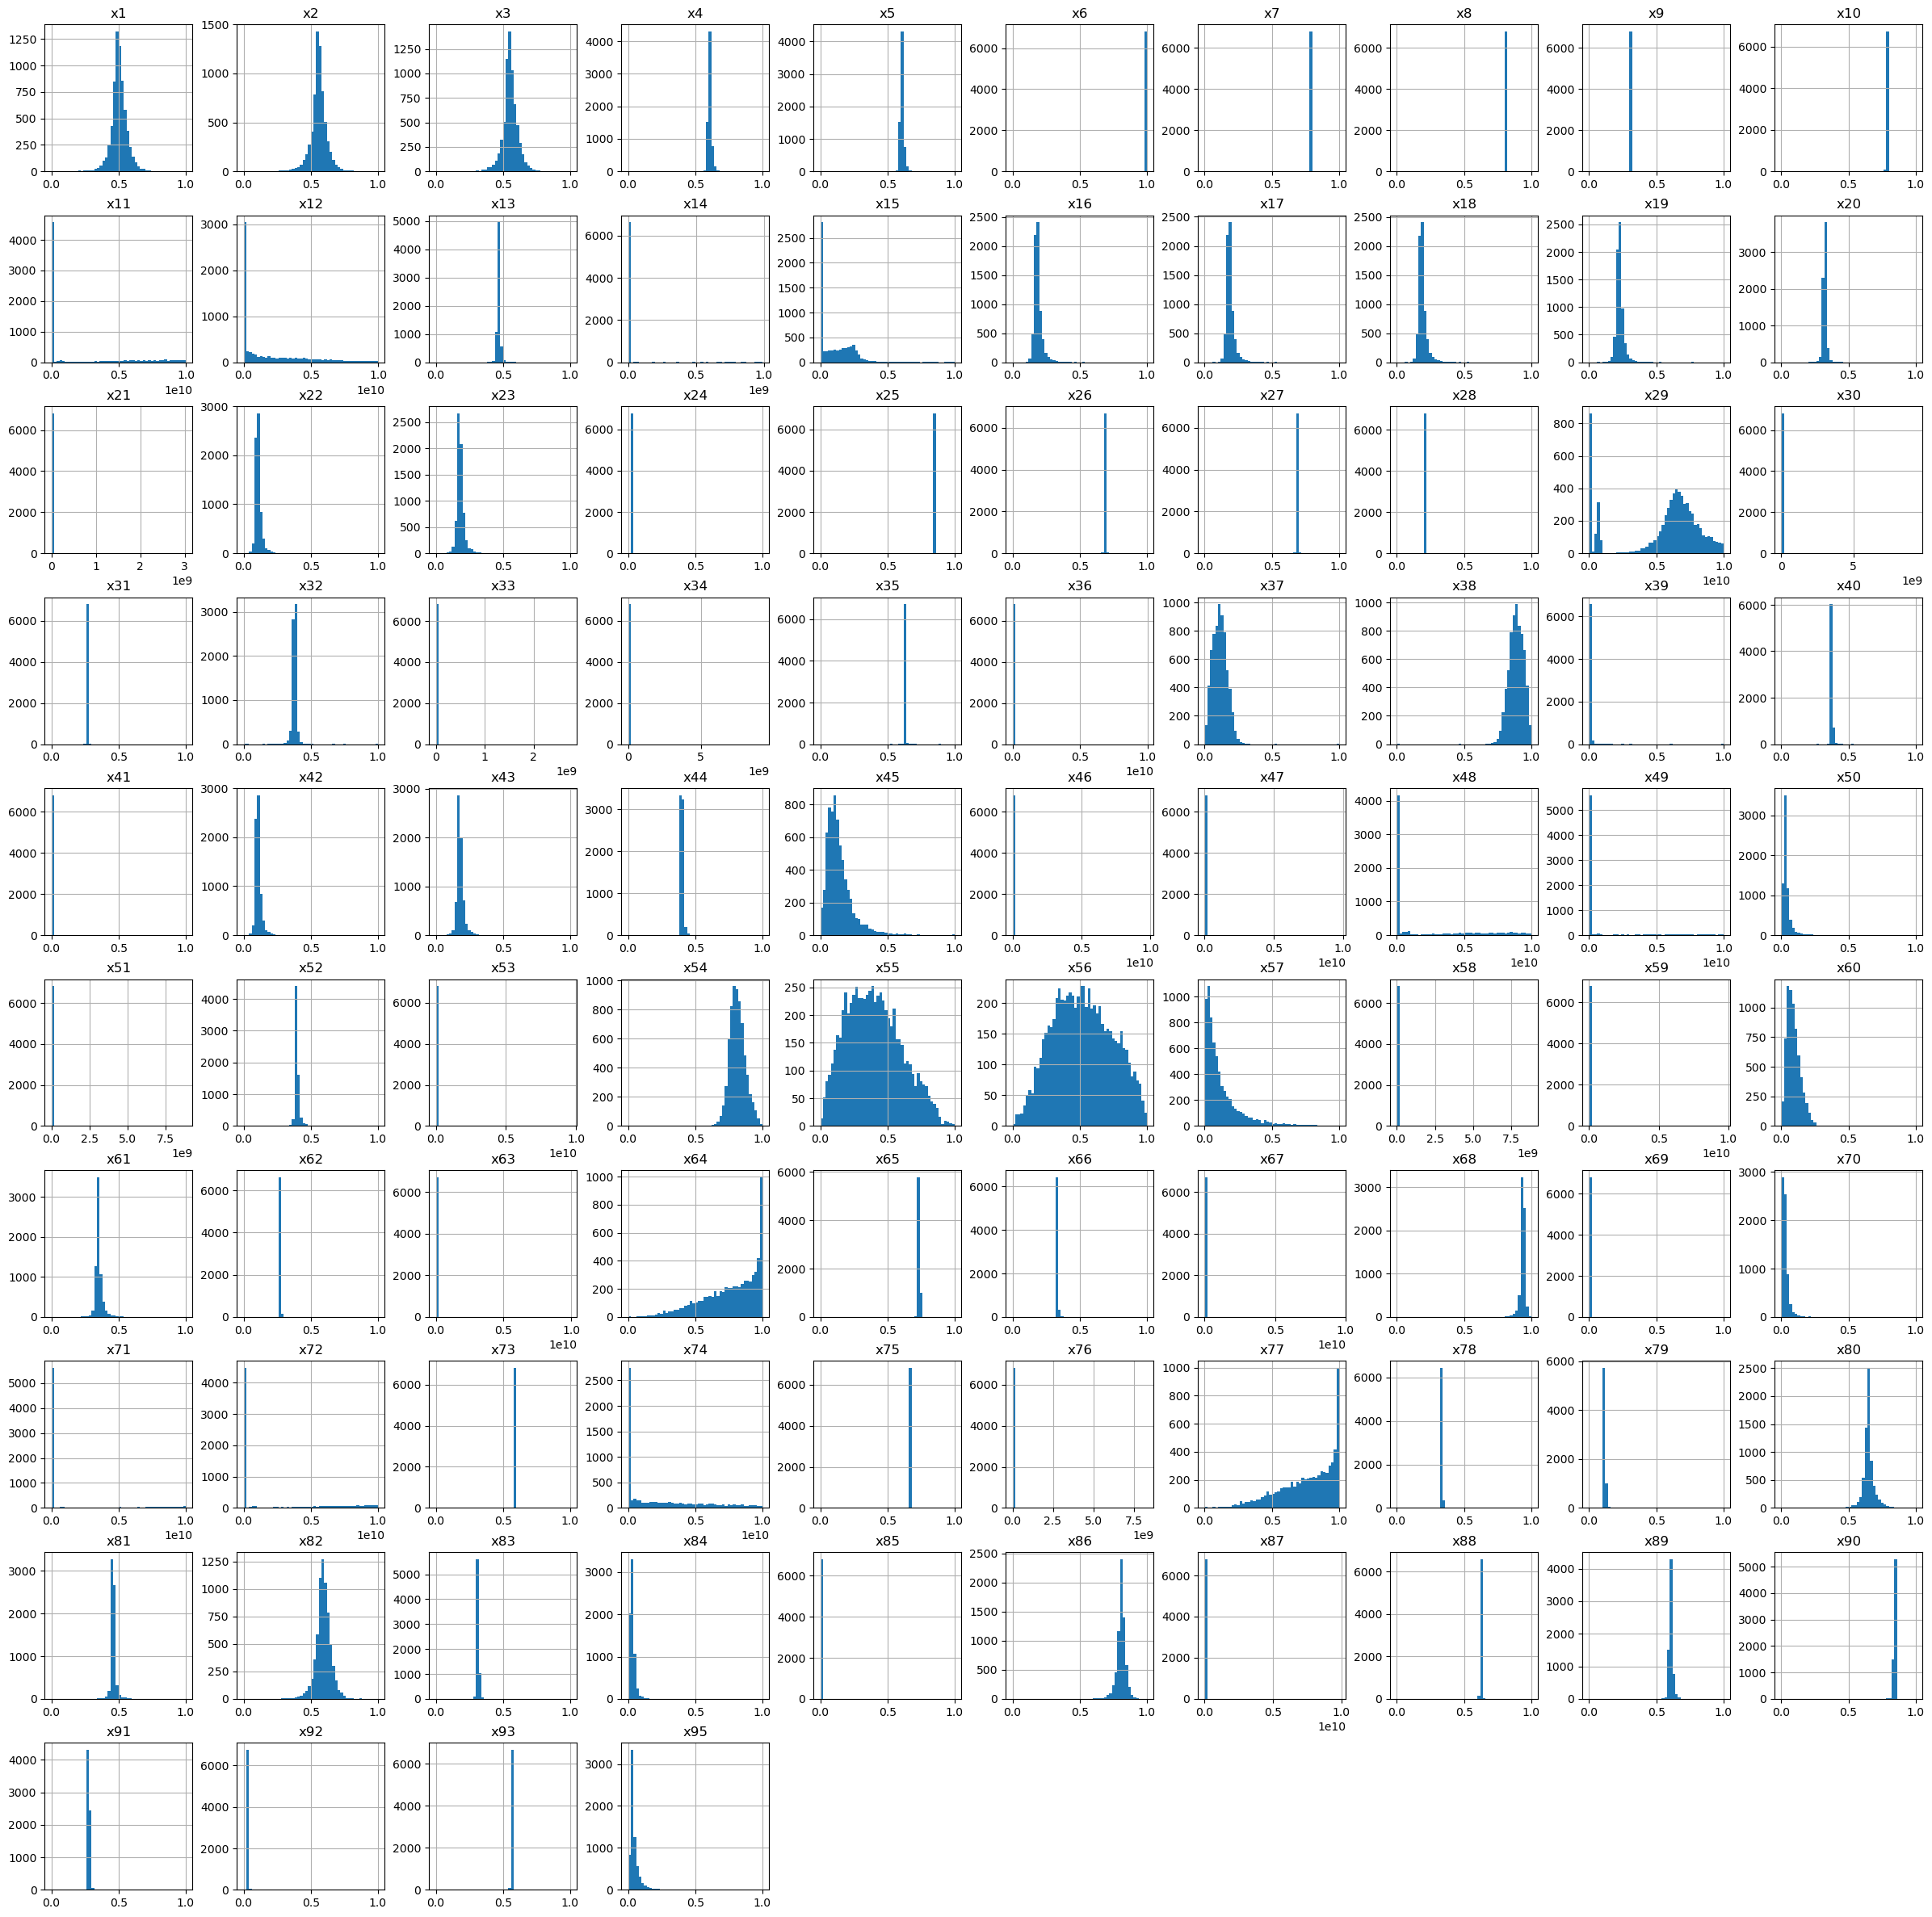

In [13]:
X.hist(bins=50, figsize=(30, 30));

=> 왜도, 유일값 수 확인해보기 근데? float 형태면 유일값수가 다 많을 수 밖에...? => 다 사용하자 => 구간화?

=> 이상치도 정리해보자 => 1이상이면 다 1로, MinMaxScale, drop

=> 아니다! 이건 regressor 가 아니라 classifier 니까 편향된 것까지는 살리자! 왜냐면 오버샘플링도 할거니까 => X

## 왜도

In [14]:
pd.DataFrame(y).agg('skew')

Bankrupt?    5.295388
dtype: float64

In [15]:
x_skew = X.agg(['skew', 'kurt']).T
x_skew[abs(x_skew['skew']) > 5.295388].count()

skew    61
kurt    61
dtype: int64

=> 95개중에서 58개?? 흠

In [16]:
# 그럼 왜도가 예측하려는 값보다 큰 것들만 보자
bigger_skew = x_skew[abs(x_skew['skew']) > 5.295388].index
bigger_skew

Index(['x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x14', 'x20', 'x21', 'x22',
       'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x30', 'x31', 'x33', 'x34',
       'x35', 'x36', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x46', 'x47',
       'x50', 'x51', 'x52', 'x53', 'x58', 'x59', 'x62', 'x63', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x73', 'x75', 'x76', 'x78', 'x79', 'x83',
       'x84', 'x85', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x95'],
      dtype='object')

In [17]:
# 역시나 유일값 수는 다들 많군...
# 그럼 다 사용을 해야 할까?
X[bigger_skew].nunique()

x4     3781
x5     3788
x6     3376
x7     3789
x8     3604
       ... 
x90    6819
x91    6819
x92    6240
x93    6240
x95    6819
Length: 61, dtype: int64

In [18]:
# # 왜도도 큰 주제에 이진값? 잘걸렸다
# # 불균형도도 굉장하군 out
# X['x85'].value_counts()

In [19]:
# X = X.drop(columns='x85').copy()

## 이상치 정리

* 1. 기준은 1보다 큰 값을 1로 통일 => 더 좋은 점수가 나옴을 확인 => 구간화도 한번 해보기
* 2. 이상치가 있는 컬럼 drop => X

In [20]:
# max() 값이 1보다 큰 피처들 확인
need_scale = X.max()[X.max() > 1].index.tolist()
need_scale

['x11',
 'x12',
 'x14',
 'x21',
 'x29',
 'x30',
 'x33',
 'x34',
 'x36',
 'x46',
 'x47',
 'x48',
 'x49',
 'x51',
 'x53',
 'x58',
 'x59',
 'x63',
 'x67',
 'x71',
 'x72',
 'x74',
 'x76',
 'x87']

In [21]:
# # 1보다 크면 이상치라 정의하고 1로 통일
# for i in need_scale:
#     X.loc[X[i] > 1, i] = 1
    
# X[need_scale].max()

In [22]:
# 최소랑 1사분위까지 0인 컬럼이 있나보네?
X[need_scale].describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,24.0,2.400000e+01,2.400000e+01,24.0,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,6819.0,7.784353e+08,1.149656e+09,0.0,2.025000e+08,3.328750e+08,1.208958e+09,8.712917e+09
std,0.0,1.342428e+09,1.319632e+09,0.0,9.920433e+08,1.314239e+09,2.229371e+09,2.554468e+09
min,6819.0,4.032850e+05,3.330216e+07,0.0,0.000000e+00,1.987816e-04,4.525945e-04,9.900000e+08
25%,6819.0,4.210478e+06,1.604633e+08,0.0,1.954716e-04,7.217793e-04,8.047101e-03,9.127500e+09
50%,6819.0,1.753872e+07,3.354782e+08,0.0,1.438314e-03,6.021810e-03,1.287824e-02,9.735000e+09
75%,6819.0,1.384499e+09,2.654009e+09,0.0,4.854371e-03,1.259426e-02,8.625000e+08,9.990000e+09
max,6819.0,5.508097e+09,3.374944e+09,0.0,4.860000e+09,6.400000e+09,7.390000e+09,1.000000e+10


In [23]:
# x67 피처는 2사분위수까지 0
X[need_scale].describe().loc['25%',:]

x11    1.566874e-04
x12    1.281880e-04
x14    2.030203e-04
x21    1.563138e-02
x29    4.860000e+09
x30    4.409689e-04
x33    7.555047e-03
x34    4.725903e-03
x36    3.007049e-03
x46    7.101336e-04
x47    4.386530e-03
x48    1.728256e-04
x49    2.330013e-04
x51    1.043285e-02
x53    4.120529e-03
x58    5.239776e-03
x59    1.973008e-03
x63    3.163148e-03
x67    0.000000e+00
x71    1.456236e-04
x72    1.417149e-04
x74    2.735337e-04
x76    8.536037e-02
x87    9.036205e-04
Name: 25%, dtype: float64

In [24]:
# 37프로면 흠 drop 까진 할 필요 없겠군?
X['x67'].value_counts(1)

0.000000e+00    0.376741
5.790000e+08    0.000293
2.790000e+08    0.000293
2.559237e-02    0.000147
2.268326e-02    0.000147
                  ...   
3.255339e-03    0.000147
2.278838e-03    0.000147
3.893648e-03    0.000147
1.029732e-03    0.000147
3.200000e+09    0.000147
Name: x67, Length: 4249, dtype: float64

In [25]:
# 사분위수를 기준으로 구간화
X[need_scale].describe()

,x11,x12,x14,x21,x29,x30,x33,x34,x36,x46,...,x53,x58,x59,x63,x67,x71,x72,x74,x76,x87
count,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,...,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03
mean,1.995347e+09,1.950427e+09,1.644801e+07,1.328641e+06,5.508097e+09,1.566212e+06,4.032850e+05,8.376595e+06,4.416337e+06,1.278971e+07,...,1.125579e+07,3.592902e+06,3.715999e+07,5.580680e+07,5.416004e+07,1.195856e+09,2.163735e+09,2.471977e+09,1.220121e+06,1.862942e+07
std,3.237684e+09,2.598292e+09,1.082750e+08,5.170709e+07,2.897718e+09,1.141594e+08,3.330216e+07,2.446847e+08,1.684069e+08,2.782598e+08,...,2.945063e+08,1.716209e+08,5.103509e+08,5.820516e+08,5.702706e+08,2.821161e+09,3.374944e+09,2.938623e+09,1.007542e+08,3.764501e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.566874e-04,1.281880e-04,2.030203e-04,1.563138e-02,4.860000e+09,4.409689e-04,7.555047e-03,4.725903e-03,3.007049e-03,7.101336e-04,...,4.120529e-03,5.239776e-03,1.973008e-03,3.163148e-03,0.000000e+00,1.456236e-04,1.417149e-04,2.735337e-04,8.536037e-02,9.036205e-04
50%,2.777589e-04,5.090000e+08,3.210321e-04,2.737571e-02,6.400000e+09,4.619555e-04,1.058717e-02,7.412472e-03,5.546284e-03,9.678107e-04,...,7.844373e-03,7.908898e-03,4.903886e-03,6.497335e-03,1.974619e-03,1.987816e-04,2.247728e-04,1.080000e+09,1.968810e-01,2.085213e-03
75%,4.145000e+09,3.450000e+09,5.325533e-04,4.635722e-02,7.390000e+09,4.993621e-04,1.626953e-02,1.224911e-02,9.273293e-03,1.454759e-03,...,1.502031e-02,1.295091e-02,1.280557e-02,1.114677e-02,9.005946e-03,4.525945e-04,4.900000e+09,4.510000e+09,3.722000e-01,5.269777e-03
max,9.990000e+09,9.980000e+09,9.900000e+08,3.020000e+09,9.990000e+09,9.330000e+09,2.750000e+09,9.230000e+09,9.940000e+09,9.740000e+09,...,9.570000e+09,8.820000e+09,9.650000e+09,9.910000e+09,9.540000e+09,1.000000e+10,1.000000e+10,1.000000e+10,8.320000e+09,9.820000e+09


In [26]:
# 각각의 사분위수 구하기
a = X[need_scale].quantile(q=[0.25,0.5,0.75,1])
b = []
for clm in need_scale:
    c = []
    for idx in a.index:
        c.append(a.loc[idx, clm])
    b.append(c)
    
b

[[0.0001566874492428, 0.0002777588583625, 4145000000.0, 9990000000.0],
 [0.000128187953762, 509000000.0, 3450000000.0, 9980000000.0],
 [0.0002030203020302, 0.0003210321032103, 0.0005325532553255, 990000000.0],
 [0.01563138073415305, 0.0273757127516373, 0.0463572152396509, 3020000000.0],
 [4860000000.0, 6400000000.0, 7390000000.0, 9990000000.0],
 [0.0004409688868264, 0.0004619555222076, 0.000499362141038, 9330000000.0],
 [0.00755504663011965, 0.0105871744549939, 0.0162695280201934, 2750000000.0],
 [0.004725903227376101, 0.0074124720675444, 0.01224910697241505, 9230000000.0],
 [0.0030070491250148, 0.005546284390702, 0.00927329266179695, 9940000000.0],
 [0.0007101336065656, 0.0009678106580909, 0.0014547594168788, 9740000000.0],
 [0.0043865304397204, 0.0065725374332349, 0.00897287558119175, 9730000000.0],
 [0.0001728255554827, 0.0007646742653862, 4620000000.0, 9990000000.0],
 [0.0002330013064716, 0.000593094234655, 0.0036523711287173, 9990000000.0],
 [0.010432854016421151, 0.01861551341744

In [27]:
need_scale.remove('x67')
need_scale

['x11',
 'x12',
 'x14',
 'x21',
 'x29',
 'x30',
 'x33',
 'x34',
 'x36',
 'x46',
 'x47',
 'x48',
 'x49',
 'x51',
 'x53',
 'x58',
 'x59',
 'x63',
 'x71',
 'x72',
 'x74',
 'x76',
 'x87']

In [28]:
qcut_name = [1, 2, 3, 4]
cut_size = 4

In [29]:
a = []
for i in need_scale:
    i = pd.qcut(X[i], q=cut_size, labels=qcut_name, duplicates='drop')
    a.append(i)
X_binned = pd.concat(a, axis=1)
X_binned = X_binned.astype(int)

In [30]:
# 0.37까지 다 0이므로 구간을 둘로만 나누겠음
X['x67'].quantile(q=0.37)

0.0

In [31]:
X_x67_binned = pd.qcut(X['x67'], q=2, labels=[0, 1])
X_binned = pd.concat([X_binned, X_x67_binned], axis=1)
X_binned = X_binned.astype(int)

In [32]:
X = pd.concat([X.drop(columns=need_scale).copy().drop(columns='x67'), X_binned], axis=1)

In [33]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x53,x58,x59,x63,x71,x72,x74,x76,x87,x67
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,4,1,1,1,4,4,2,4,4,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,3,1,1,2,1,4,3,4,4,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,4,2,4,4,4,3,2,3,4,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,4,1,1,2,4,4,3,4,3,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,4,1,1,2,4,4,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,2,2,3,4,3,1,1,4,1,0
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,1,2,2,3,2,1,4,2,2,1
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,1,4,4,3,2,2,2,1,3,0
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,2,2,3,4,3,1,1,3,3,1


In [34]:
X.isnull().sum().sum()

0

In [35]:
# 1보다 크면 이상치라 정의하고 drop
# X = X.drop(columns=need_scale)
# 해본 결과 좋지 않은 방법인 듯

# 데이터 분리

In [36]:
# train test 분리
from sklearn.model_selection import train_test_split

# train_test_split?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4773, 94), (2046, 94), (4773,), (2046,))

In [37]:
# stratify=y 로 비율 잘 나뉘었는지 확인
y_train.value_counts(1), y_test.value_counts(1)

(0    0.967735
 1    0.032265
 Name: Bankrupt?, dtype: float64,
 0    0.967742
 1    0.032258
 Name: Bankrupt?, dtype: float64)

In [38]:
# train, test, solution
train = pd.concat([X_train, y_train], axis=1)
test = X_test
solution = y_test

train.shape, test.shape, solution.shape

((4773, 95), (2046, 94), (2046,))

In [39]:
# train 데이터를 다시 train 과 valid 로 분리
X_train_train, X_train_valid, y_train_train, y_train_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42,
                                                                              stratify=train[label_name])

X_train_train.shape, X_train_valid.shape, y_train_train.shape, y_train_valid.shape

((4295, 94), (478, 94), (4295,), (478,))

## 이상치 정리

* MinMaxScaler 사용 => 결과가 별로..

In [40]:
# from sklearn.preprocessing import MinMaxScaler

# scaled = X_train_train
# scaled_2 = X_train_valid

# scaler = MinMaxScaler()

# scaled = scaler.fit_transform(scaled)
# scaled_2 = scaler.transform(scaled_2)

# scaled = pd.DataFrame(scaled, columns=X_train_train.columns, index=X_train_train.index)
# scaled_2 = pd.DataFrame(scaled_2, columns=X_train_valid.columns, index=X_train_valid.index)

In [41]:
# X_train_train = scaled.copy()
# X_train_valid = scaled_2.copy()

In [42]:
# X_train_train.isnull().sum().sum()

In [43]:
# X_train_valid.isnull().sum().sum()

# 데이터 불균형 정도 파악

In [44]:
# 불균형 정도 파악하기
y_train_train.value_counts(1)

0    0.967637
1    0.032363
Name: Bankrupt?, dtype: float64

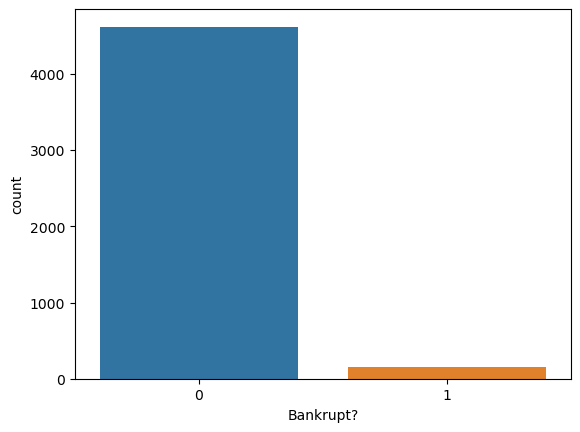

In [45]:
sns.countplot(data=train, x=label_name);

In [46]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt_model= DecisionTreeClassifier(random_state=42)

dt_model

DecisionTreeClassifier(random_state=42)

In [47]:
# fit
dt_model.fit(X_train_train, y_train_train)

DecisionTreeClassifier(random_state=42)

In [48]:
# predict
dt_y_train_predict = dt_model.predict(X_train_valid)
dt_y_train_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [49]:
# predict_proba
dt_y_predict_proba = dt_model.predict_proba(X_train_valid)
dt_y_predict_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [50]:
# y_test, y_pred 비교
(y_train_valid == dt_y_train_predict).mean()

0.9581589958158996

In [51]:
# crosstab
pd.crosstab(y_train_valid, dt_y_train_predict)

col_0,0,1
Bankrupt?,,
0,451,12
1,8,7


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_valid, dt_y_train_predict)
cm

array([[451,  12],
       [  8,   7]], dtype=int64)

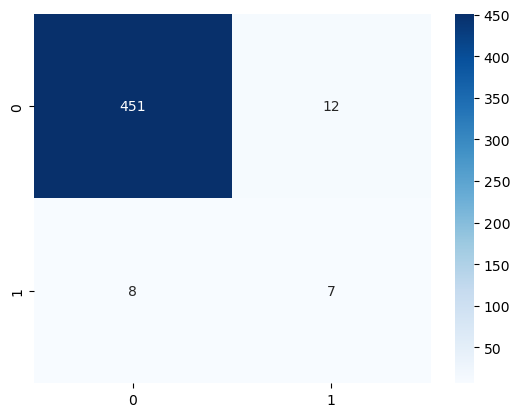

In [53]:
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues');

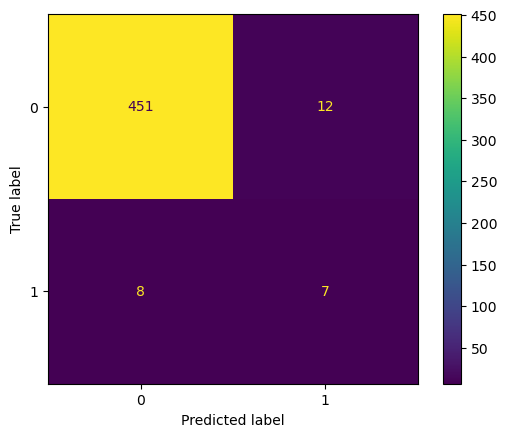

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

dsp = ConfusionMatrixDisplay(cm)
dsp.plot();

In [55]:
# 해석 필요
from sklearn.metrics import classification_report

print(classification_report(y_train_valid, dt_y_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       463
           1       0.37      0.47      0.41        15

    accuracy                           0.96       478
   macro avg       0.68      0.72      0.70       478
weighted avg       0.96      0.96      0.96       478



In [56]:
from sklearn.metrics import recall_score, f1_score

dt_y_train_valid_predict = dt_model.predict(X_train_valid)
recall_score(y_train_valid, dt_y_train_valid_predict), f1_score(y_train_valid, dt_y_train_valid_predict)

(0.4666666666666667, 0.4117647058823529)

=> 오버샘플링 해야겠군..

# 오버샘플링

In [57]:
# valid 는 실제 test 데이터라고 생각하고 검증해야 하므로 train_train 데이터만 오버샘플링
X_train_train.shape, y_train_train.shape

((4295, 94), (4295,))

In [58]:
# 오버샘플링
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train_train, y_train_train)

In [59]:
X_train_over.shape, y_train_over.shape

((8312, 94), (8312,))

In [60]:
# 불균형 해소
y_train_over.value_counts()

0    4156
1    4156
Name: Bankrupt?, dtype: int64

In [61]:
dt_model.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=42)

In [62]:
dt_y_train_valid_predict = dt_model.predict(X_train_valid)

In [63]:
recall_score(y_train_valid, dt_y_train_valid_predict), f1_score(y_train_valid, dt_y_train_valid_predict)

(0.2, 0.15789473684210528)

In [64]:
dt_y_predict = dt_model.predict(X_test)

In [65]:
recall_score(solution, dt_y_predict), f1_score(solution, dt_y_predict)

(0.3484848484848485, 0.27710843373493976)

=> 오버샘플링하면 좋아지는게 맞나..?

# 랜덤포레스트

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42,
                                  n_estimators=400,
                                  criterion='gini') # 불순도 측정 시 목표 변수가 범주형인 경우 지니 계수를 사용

rf_model.fit(X_train_over, y_train_over)

rf_y_train_valid_predict = rf_model.predict(X_train_valid)

In [67]:
recall_score(y_train_valid, rf_y_train_valid_predict), f1_score(y_train_valid, rf_y_train_valid_predict)

(0.3333333333333333, 0.3703703703703704)

In [68]:
rf_y_predict = rf_model.predict(X_test)

In [69]:
recall_score(solution, rf_y_predict), f1_score(solution, rf_y_predict)

(0.48484848484848486, 0.44755244755244755)

# Extra Tree

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=400,
                                criterion='gini')

et_model.fit(X_train_over, y_train_over)

et_y_train_valid_predict = et_model.predict(X_train_valid)

In [71]:
recall_score(y_train_valid, et_y_train_valid_predict), f1_score(y_train_valid, et_y_train_valid_predict)

(0.26666666666666666, 0.33333333333333337)

In [72]:
et_y_predict = et_model.predict(X_test)

In [73]:
recall_score(solution, et_y_predict), f1_score(solution, et_y_predict)

(0.5454545454545454, 0.5255474452554744)

# XGBoost

In [74]:
import xgboost

xgb_model = xgboost.XGBClassifier(random_state=42,
                                  n_estimators=300,
                                  n_jobs=-1)

xgb_model.fit(X_train_over, y_train_over)

xgb_y_train_valid_predict = xgb_model.predict(X_train_valid)

In [75]:
recall_score(y_train_valid, xgb_y_train_valid_predict), f1_score(y_train_valid, xgb_y_train_valid_predict)

(0.3333333333333333, 0.3703703703703704)

In [76]:
xgb_y_predict = xgb_model.predict(X_test)

In [77]:
recall_score(solution, xgb_y_predict), f1_score(solution, xgb_y_predict)

(0.48484848484848486, 0.4705882352941177)

# LightGBM

In [78]:
import lightgbm

lgbm_model = lightgbm.LGBMClassifier(random_state=42,
                                     n_estimators=300,
                                     n_jobs=-1)

lgbm_model.fit(X_train_over, y_train_over)

lgbm_y_train_valid_predict = lgbm_model.predict(X_train_valid)

In [79]:
recall_score(y_train_valid, lgbm_y_train_valid_predict), f1_score(y_train_valid, lgbm_y_train_valid_predict)

(0.2, 0.27272727272727276)

In [80]:
lgbm_y_predict = lgbm_model.predict(X_test)

In [81]:
recall_score(solution, lgbm_y_predict), f1_score(solution, lgbm_y_predict)

(0.45454545454545453, 0.46874999999999994)

# CatBoost

In [82]:
import catboost

cat_model = catboost.CatBoostClassifier(random_state=42,
                                        n_estimators=300)

cat_model.fit(X_train_over, y_train_over)

cat_y_train_valid_predict = cat_model.predict(X_train_valid)

Learning rate set to 0.076759
0:	learn: 0.6086863	total: 157ms	remaining: 47s
1:	learn: 0.5408115	total: 164ms	remaining: 24.5s
2:	learn: 0.4815990	total: 171ms	remaining: 16.9s
3:	learn: 0.4259438	total: 178ms	remaining: 13.2s
4:	learn: 0.3702925	total: 185ms	remaining: 10.9s
5:	learn: 0.3319732	total: 192ms	remaining: 9.4s
6:	learn: 0.3047651	total: 199ms	remaining: 8.32s
7:	learn: 0.2869290	total: 206ms	remaining: 7.54s
8:	learn: 0.2697417	total: 214ms	remaining: 6.92s
9:	learn: 0.2509555	total: 221ms	remaining: 6.41s
10:	learn: 0.2377971	total: 228ms	remaining: 5.99s
11:	learn: 0.2282100	total: 235ms	remaining: 5.63s
12:	learn: 0.2164091	total: 242ms	remaining: 5.34s
13:	learn: 0.2070819	total: 249ms	remaining: 5.08s
14:	learn: 0.1984114	total: 255ms	remaining: 4.85s
15:	learn: 0.1890075	total: 262ms	remaining: 4.66s
16:	learn: 0.1808948	total: 269ms	remaining: 4.49s
17:	learn: 0.1751725	total: 277ms	remaining: 4.33s
18:	learn: 0.1681001	total: 284ms	remaining: 4.2s
19:	learn: 0.16

176:	learn: 0.0259280	total: 1.45s	remaining: 1s
177:	learn: 0.0257250	total: 1.46s	remaining: 998ms
178:	learn: 0.0253847	total: 1.46s	remaining: 989ms
179:	learn: 0.0253051	total: 1.47s	remaining: 979ms
180:	learn: 0.0251761	total: 1.48s	remaining: 970ms
181:	learn: 0.0248119	total: 1.48s	remaining: 961ms
182:	learn: 0.0243810	total: 1.49s	remaining: 953ms
183:	learn: 0.0241982	total: 1.5s	remaining: 944ms
184:	learn: 0.0240089	total: 1.5s	remaining: 935ms
185:	learn: 0.0237694	total: 1.51s	remaining: 926ms
186:	learn: 0.0236337	total: 1.52s	remaining: 917ms
187:	learn: 0.0232800	total: 1.52s	remaining: 908ms
188:	learn: 0.0231199	total: 1.53s	remaining: 899ms
189:	learn: 0.0229591	total: 1.54s	remaining: 891ms
190:	learn: 0.0227101	total: 1.54s	remaining: 882ms
191:	learn: 0.0225318	total: 1.55s	remaining: 874ms
192:	learn: 0.0223615	total: 1.56s	remaining: 865ms
193:	learn: 0.0222467	total: 1.57s	remaining: 856ms
194:	learn: 0.0220821	total: 1.57s	remaining: 848ms
195:	learn: 0.022

In [83]:
recall_score(y_train_valid, cat_y_train_valid_predict), f1_score(y_train_valid, cat_y_train_valid_predict)

(0.3333333333333333, 0.3225806451612903)

In [84]:
cat_y_predict = cat_model.predict(X_test)

In [85]:
recall_score(solution, cat_y_predict), f1_score(solution, cat_y_predict)

(0.5151515151515151, 0.4657534246575342)

# 점수가 제일 좋았던 모델로 랜덤서치

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

rs_model = ExtraTreesClassifier(random_state=42,
                                criterion='gini')
#                                 max_depth=None,
#                                 max_features=None)
#                                 bootstrap=True)

In [87]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators' : [100, 200, 300, 400, 500]}
#                        'min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3, 0.4],
#                        'min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4],
#                        'warm_start' : [False, True],
#                        'ccp_alpha' : [0.0, 0.1, 0.2, 0.3, 0.4],
#                        'max_samples' : [0.0, 0.1, 0.2, 0.3, 0.4]}

cls = RandomizedSearchCV(rs_model, param_distributions, n_iter=200, scoring='f1', n_jobs=-1, cv=5, verbose=0)

cls.fit(X_train, y_train)

best_model = cls.best_estimator_

best_model

C:\Users\mook\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=200. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ExtraTreesClassifier(n_estimators=300, random_state=42)

In [88]:
pd.DataFrame(cls.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.132921,0.043522,0.062630,2.568732e-04,300,{'n_estimators': 300},0.108108,0.315789,0.162162,0.324324,0.166667,0.215410,0.087936,1
3,1.427562,0.058120,0.071875,7.653604e-03,400,{'n_estimators': 400},0.108108,0.315789,0.162162,0.324324,0.166667,0.215410,0.087936,1
4,1.567282,0.092783,0.073914,6.082182e-03,500,{'n_estimators': 500},0.108108,0.315789,0.157895,0.270270,0.166667,0.203746,0.076945,3
0,0.387732,0.015845,0.028302,4.182924e-03,100,{'n_estimators': 100},0.105263,0.277778,0.162162,0.277778,0.171429,0.198882,0.068287,4
1,0.765607,0.008928,0.046875,4.768372e-07,200,{'n_estimators': 200},0.105263,0.315789,0.162162,0.235294,0.166667,0.197035,0.072287,5


In [89]:
y_predict = best_model.predict(X_test)

recall_score(solution, y_predict), f1_score(solution, y_predict)

(0.15151515151515152, 0.25641025641025644)

=> 파라미터 문제가 아니고

=> CV 문제 때문에 오버샘플링 안 한 X_train 으로 학습을 해서

=> 데이터 불균형으로 인해 모델의 성능이 떨어지게 된 것!